У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

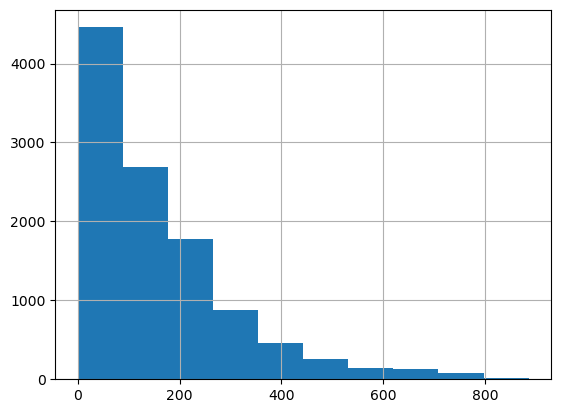

In [4]:
df.registered.hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

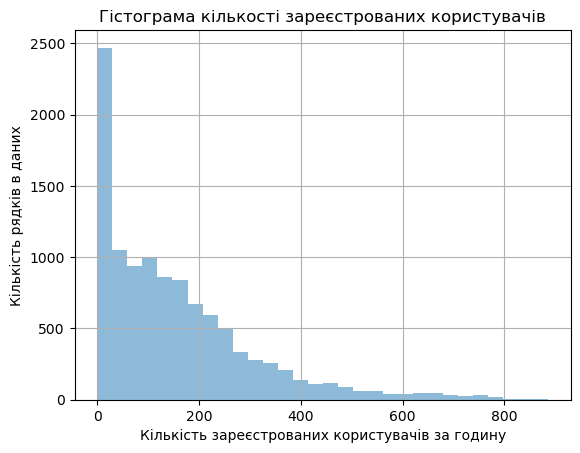

In [8]:
df.registered.hist(bins=30, alpha=0.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних');

Після збільшення кількості бінів діаграма стала більш деталізованою. Можна визначити, що найбільше записів (майже 2500) з реєстрацією приблизно 30 користувачів за годину. Хоча бувають і значення 400-800 користувачів на годину - потрібен більш детальний аналіз саме цих даних для визначення можливих тенденцій зростання кількості користувачів. 
Досить невисокі показники попиту можуть вказувати на недостатню рекламу, невдале розташування стоянок елетровелосипедів, розвинуту транспортну систему загального користування або поганий стан доріг тощо. 

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [9]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [10]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [11]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [15]:
df[df.registered == 0].head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,5
210,2011-01-10 01:00:00,1,0,1,1,4.92,6.060,50,19.0012,1,0,1,0
456,2011-02-02 02:00:00,1,0,1,3,9.02,11.365,93,8.9981,4,0,4,2


In [23]:
df_dayofweek = df[df.registered == 0].groupby('dayofweek')['registered'].count().reset_index()
df_dayofweek

,dayofweek,registered
0,0,5
1,1,3
2,2,2
3,3,1
4,4,1
5,5,1
6,6,2


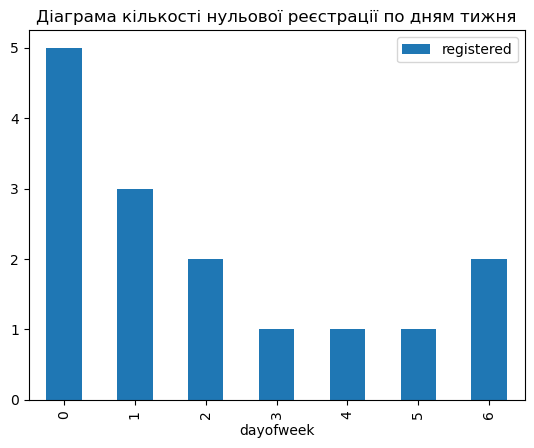

In [40]:
df_dayofweek.plot.bar(x='dayofweek', y='registered')
plt.title('Діаграма кількості нульової реєстрації по дням тижня');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [36]:
df_weather = df.groupby('weather')['registered'].sum().reset_index()
df_weather

,weather,registered
0,1,1186163
1,2,419914
2,3,87106
3,4,158


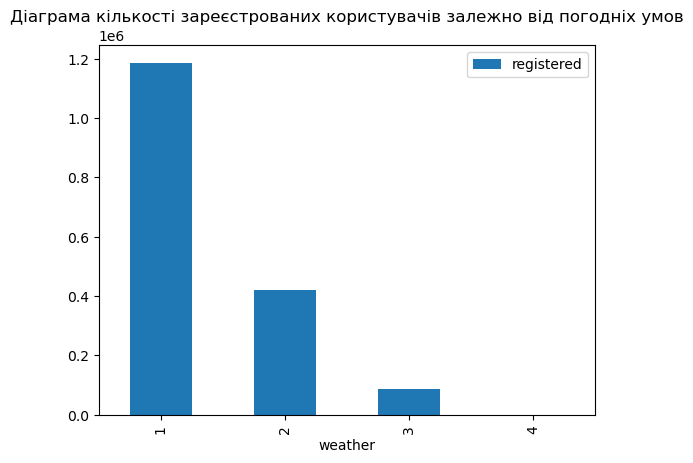

In [41]:
df_weather.plot.bar(x='weather', y='registered')
plt.title('Діаграма кількості зареєстрованих користувачів залежно від погодніх умов');

Стовпчаста діаграма відображає пряму залежність від умов погоди: при сонячній теплій погоді - відбувається більшість поїздок, і їх кількість зменшується з погіршенням умов

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

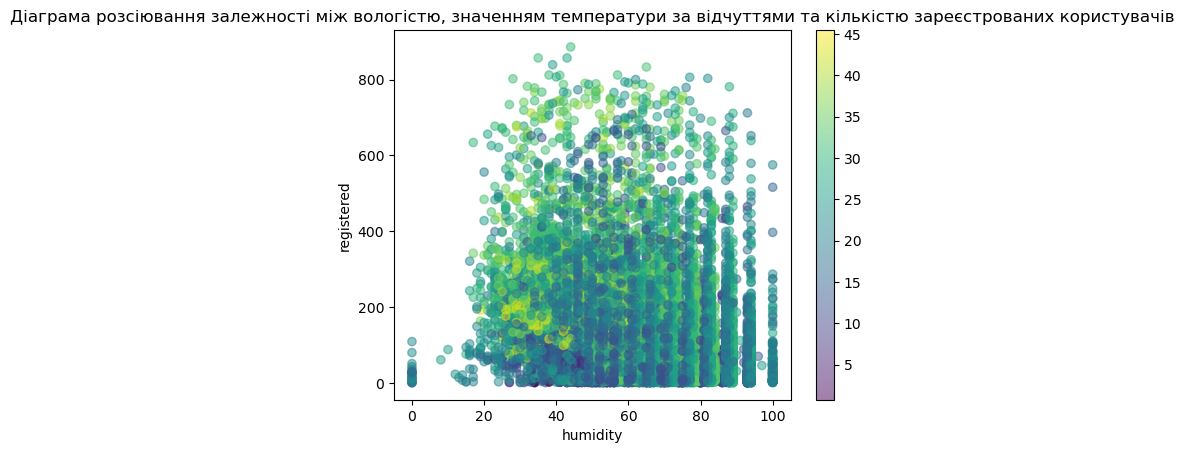

In [52]:
plt.figure
plt.scatter(df['humidity'], df['registered'], c=df['atemp'], alpha=0.5)
plt.title('Діаграма розсіювання залежності між вологістю, значенням температури за відчуттями та кількістю зареєстрованих користувачів')
plt.xlabel('humidity')
plt.ylabel('registered')
plt.colorbar();

Дивлячись на діаграму, можемо зробити висновок, що вологість та температура не сильно впливають на кількість зареєстрованих користувачів. Лише при значенні вологості 90-100 та нижче 20, можна відмітити суттєве зниження кількості значень. 
Також бачимо певну кількість помилкових даних, т.я. вологість не може приймати значення 0.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)